# Explore

Original example on stackoverflow
at https://stackoverflow.com/questions/44670708/draw-line-on-top-of-subplot-to-render-a-zoom-effect



(<mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fae58739210>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnectorPatch at 0x7fae58739710>)

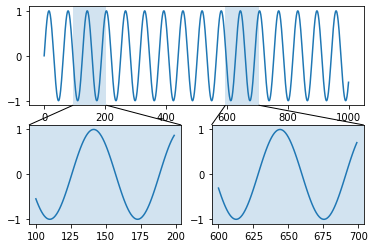

In [1]:
print('Original example on stackoverflow')
print('at https://stackoverflow.com/questions/44670708/draw-line-on-top-of-subplot-to-render-a-zoom-effect')
print()

from matplotlib.transforms import Bbox, TransformedBbox, blended_transform_factory

from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector,\
    BboxConnectorPatch


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1)*0.2

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p



def zoom_effect_xaxis(ax1, ax2, **kwargs):
    """
    ax2 : the big main axes
    ax1 : the zoomed axes
    The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=2, loc2a=3, loc1b=1, loc2b=4, 
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

import matplotlib.pyplot as plt
import numpy as np

t=np.arange(1000)
x=np.sin(np.arange(1000)/10.)

plt.figure()
ax1 = plt.subplot(2,1,1)
plt.plot(t,x)

ax2 = plt.subplot(2,2,3)
plt.plot(t[100:200],x[100:200])
zoom_effect_xaxis(ax2, ax1)
ax3 = plt.subplot(2,2,4)
plt.plot(t[600:700],x[600:700])
zoom_effect_xaxis(ax3, ax1)


Adapted example for zoomming on y axis



(<mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fae58965050>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnectorPatch at 0x7fae58965550>)

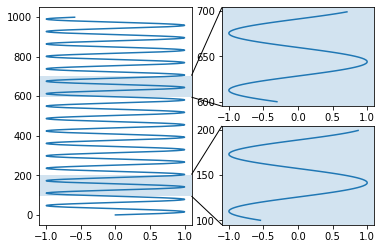

In [2]:
print('Adapted example for zoomming on y axis')
print()

from matplotlib.transforms import Bbox, TransformedBbox, blended_transform_factory

from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector,\
    BboxConnectorPatch


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1)*0.2

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect_yaxis(ax1, ax2, **kwargs):
    """
    ax2 : the big main axes
    ax1 : the zoomed axes
    The ymin & ymax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(tt,ax2.transData)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=2, loc2a=1, loc1b=3, loc2b=4, 
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

import matplotlib.pyplot as plt
import numpy as np

t=np.arange(1000)
x=np.sin(np.arange(1000)/10.)

# test x-t reversed
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(x,t)

ax2 = plt.subplot(2,2,2)
plt.plot(x[600:700],t[600:700])
zoom_effect_yaxis(ax2, ax1)
ax3 = plt.subplot(2,2,4)
plt.plot(x[100:200],t[100:200])
zoom_effect_yaxis(ax3, ax1)

# Cleaner commented code (to finish)

In [3]:
# For creating boxes and transformations
from matplotlib.transforms import Bbox, TransformedBbox, blended_transform_factory
# For connecting between boxes
from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector,\
    BboxConnectorPatch


def connect_bbox(bbox1:Bbox, bbox2:Bbox,
                 loc1a:int, loc2a:int, loc1b:int, loc2b:int,
                 prop_lines, prop_patches=None):
    """Drawing lines between boxes corners.
    
    """
    
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1)*0.2

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p



def zoom_effect_xaxis(ax1, ax2, **kwargs):
    """ Creating underlying boxes in zoomed and main subplots, 
    and connect their x-axes. The xmin & xmax will be taken from the ax1.viewLim.
    
    Args:
        ax1 : the zoomed axes
        ax2 : the big main axes
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=2, loc2a=3, loc1b=1, loc2b=4, 
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

def zoom_effect_yaxis(ax1, ax2, **kwargs):
    """ Creating underlying boxes in zoomed and main subplots, 
    and connect their y-axes. The ymin & ymax will be taken from the ax1.viewLim.
    
    Args:
        ax1 : the zoomed axes
        ax2 : the big main axes
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(tt,ax2.transData)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=2, loc2a=1, loc1b=3, loc2b=4, 
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p